Author: @Kosmas Kanellakis

Student Code: t8200053

e-mail: t8200053@aueb.gr

Date: 02/12/2023

# Instructions

You need to have the `.tab`, `.xls` files downloaded in the same folder as the "Assignment2.ipynb"
* NAVCO 1.2 Updated.tab
* p5v2018.xls

You also need to have imported the libraries into your system
* pandas
* matplotlib
* statsmodels

# Import libraries and load file

In [21]:
# Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm

# Load the data
data_NAVCO = pd.read_csv('NAVCO 1.2 Updated.tab', sep='\t')
data_polity = pd.read_excel("p5v2018.xls", sheet_name="p5v2018")

## 1. Exploration of Historical Trends

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

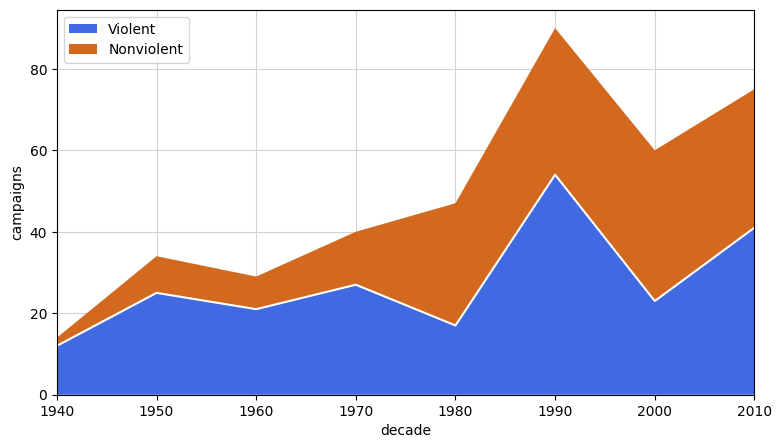

In [22]:
# Create a copy_NAVCO of the data
copy_NAVCO1 = data_NAVCO.copy()

# Create a new column for the decade
copy_NAVCO1['DECADE'] = (copy_NAVCO1['EYEAR'] // 10) * 10

# Group by the decade and the type of campaign
grouped = copy_NAVCO1.groupby(['DECADE', 'NONVIOL']).size().unstack(fill_value=0)

# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(9, 5))

# Create the stackplot
ax.stackplot(grouped.index, grouped[0], grouped[1], labels=['Violent', 'Nonviolent'], colors=['royalblue', 'chocolate'])

# Add a line where the violent graph ends and the nonviolent starts
ax.plot(grouped.index, grouped[0], color='white')

# Add labels and title
ax.set_xlabel('decade')
ax.set_ylabel('campaigns')
ax.legend(loc='upper left')

# Make the x-axis take the whole width of the figure
ax.set_xlim(left=grouped.index.min(), right=grouped.index.max())

# Add gridlines
ax.grid(color='lightgrey')

# Set gridlines to go behind other graph elements
ax.set_axisbelow(True)

# Show the plot
plt.show()

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics.

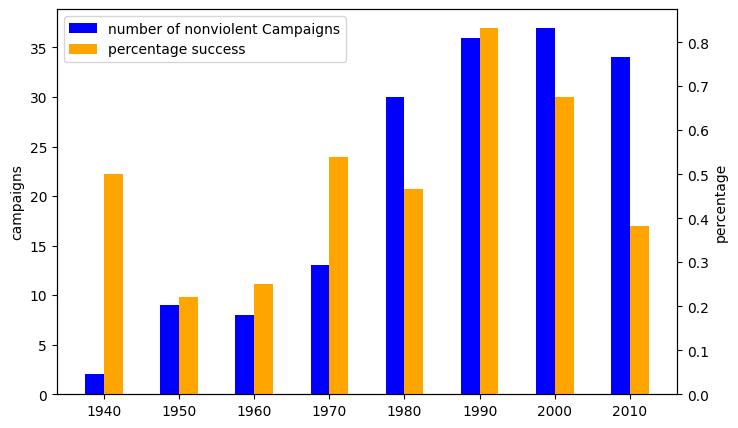

In [23]:
# Filter for nonviolent campaigns and calculate the number of campaigns and success rate per decade
copy_nonviol = copy_NAVCO1[copy_NAVCO1['NONVIOL'] == 1.0]
copy_decade = copy_nonviol.groupby('DECADE').agg({'NONVIOL': 'count', 'SUCCESS': 'mean'})

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set the width of a bar in the barchart
width = 2.5

# Create a bar plot for the number of campaigns
ax.bar(copy_decade.index - width/2, copy_decade['NONVIOL'], width, color='blue', label='number of nonviolent Campaigns')

# Create a second y-axis
ax1 = ax.twinx()

# Create a bar plot for the success rate on the second y-axis
ax1.bar(copy_decade.index + width/2, copy_decade['SUCCESS'], width, color='orange', label='percentage success')

# Set the labels for the y-axes
ax.set_ylabel('campaigns')
ax1.set_ylabel('percentage')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.show()


Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should look like the following, showing that nonviolent campaigns have higher success probabilities.

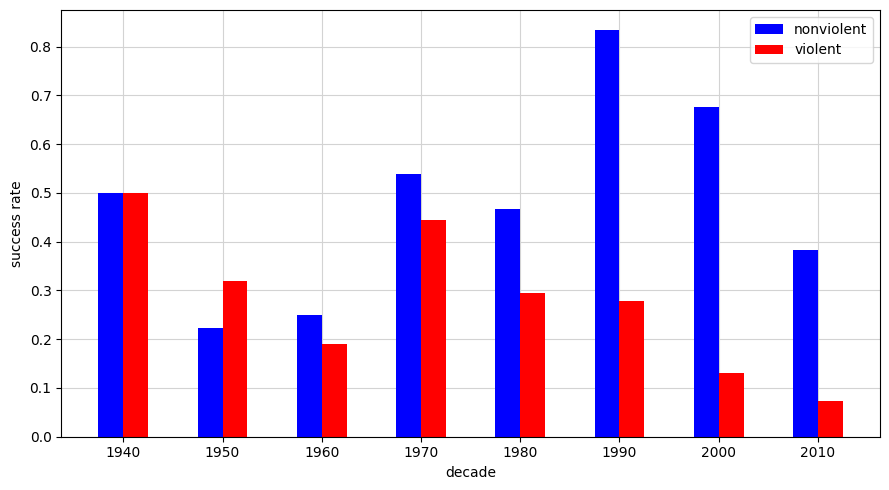

In [24]:
# Calculate the number of campaigns and success rate per decade for both violent and nonviolent campaigns
copy_decade = copy_NAVCO1.groupby(['DECADE', 'NONVIOL']).agg({'NONVIOL': 'count', 'SUCCESS': 'mean'}).rename(columns={'NONVIOL': 'COUNT'})

# Create the plot
fig, ax = plt.subplots(figsize=(9, 5))

# Calculate the width of a bar in the barchart
width = 2.5

# Create a bar plot for the success rate of nonviolent campaigns
ax.bar(copy_decade.loc[pd.IndexSlice[:, 1.0], :].index.get_level_values('DECADE') - width/2, copy_decade.loc[pd.IndexSlice[:, 1.0], 'SUCCESS'], width, color='blue', label='nonviolent')

# Create a bar plot for the success rate of violent campaigns
ax.bar(copy_decade.loc[pd.IndexSlice[:, 0.0], :].index.get_level_values('DECADE') + width/2, copy_decade.loc[pd.IndexSlice[:, 0.0], 'SUCCESS'], width, color='red', label='violent')

# Set the labels for the x-axis and y-axis
ax.set_xlabel('decade')
ax.set_ylabel('success rate')

# Add gridlines
ax.grid(color='lightgrey')

# Set gridlines to go behind other graph elements
ax.set_axisbelow(True)

# Add a legend
ax.legend()

fig.tight_layout()
plt.show()


## 2. Largest Resistance Campaigns, 1946-2014

Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%.

Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

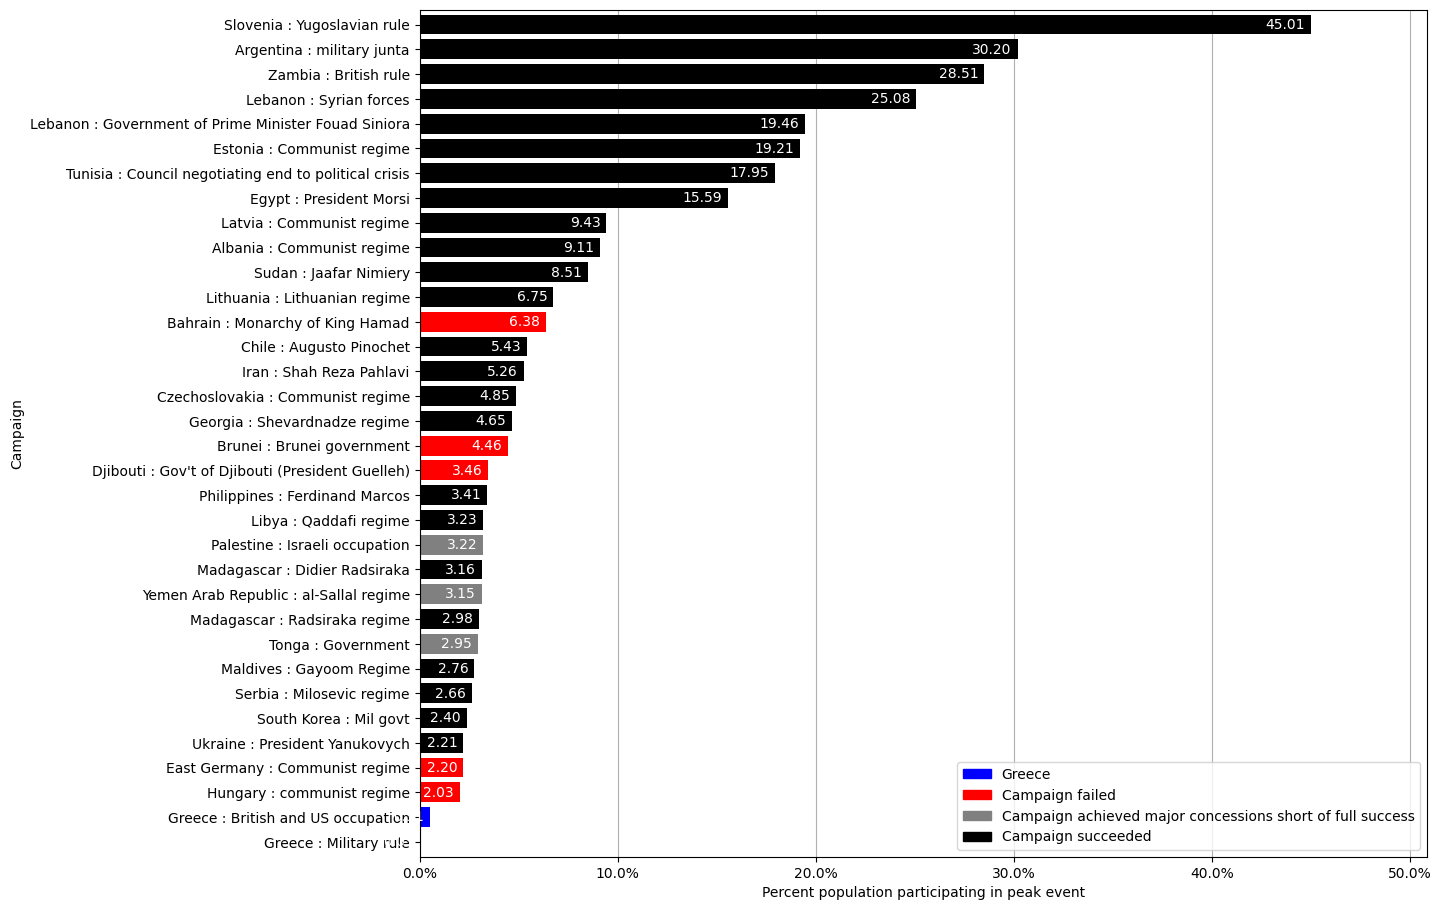

In [25]:
# Copy the data
copy_NAVCO2 = data_NAVCO.copy()

# Filter the data
filtered_data = copy_NAVCO2[(copy_NAVCO2['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02) | (copy_NAVCO2['LOCATION'] == 'Greece')].copy()

# Create a new column combining 'LOCATION' and 'TARGET'
filtered_data.loc[:, 'LOCATION_TARGET'] = filtered_data['LOCATION'] + " : " + filtered_data['TARGET']

# Convert 'PERCENTAGEPOPULARPARTICIPATION' to percentage
filtered_data['PERCENTAGEPOPULARPARTICIPATION'] *= 100

# Sort the data for better visualization
sorted_data = filtered_data.sort_values(by='PERCENTAGEPOPULARPARTICIPATION')

# Create a color map based on 'SUCCESS', 'FAILURE', 'LIMITED', and 'LOCATION'
conditions = [
    (sorted_data['LOCATION'] == 'Greece'),
    (sorted_data['FAILURE'] == 1.0),
    (sorted_data['LIMITED'] == 1.0),
    (sorted_data['SUCCESS'] == 1.0)
]
choices = ['blue', 'red', 'gray', 'black']
colors = np.select(conditions, choices, default='blue')

# Create the plot
fig, ax = plt.subplots(figsize=(13, 11))
bars = ax.barh(sorted_data['LOCATION_TARGET'], sorted_data['PERCENTAGEPOPULARPARTICIPATION'], color=colors)

# Add data labels inside the bars
for bar in bars:
    ax.text(bar.get_width() - 0.3, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='right', color='white')

# Add legend
ax.legend([plt.Rectangle((0,0),1,1, color=color) for color in choices], ['Greece', 'Campaign failed', 'Campaign achieved major concessions short of full success', 'Campaign succeeded'])

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Percent population participating in peak event')
ax.set_ylabel('Campaign')

# Set y-axis limits to remove white space
ax.set_ylim(-0.6, len(sorted_data['LOCATION_TARGET']) - 0.4)

# Format x-axis to show percentages
formatter = FuncFormatter(lambda y, _: '{:.1f}%'.format(y))
ax.xaxis.set_major_formatter(formatter)

# Add gridlines
plt.grid(axis = 'x')

# Set x-axis limits to make it larger
ax.set_xlim(0, sorted_data['PERCENTAGEPOPULARPARTICIPATION'].max() * 1.13)

# Set gridlines to go behind other graph elements
ax.set_axisbelow(True)

plt.show()


## 3. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis. Explain it as best you can.

Then, do the same but with only the membership per capital as dependent variable. Explain why is this different than the previous one


Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.1297
Time:                        20:42:19   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.189e-15
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.8142      1.496     -1.881      0.060

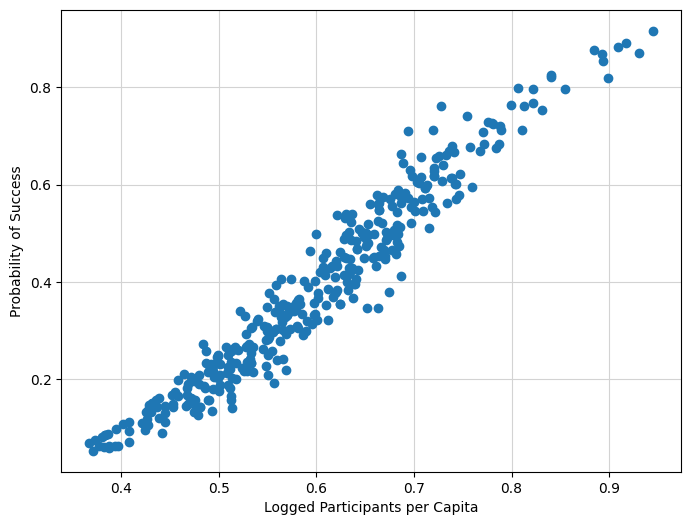

In [26]:
# Copy the data
copy_NAVCO3 = data_NAVCO.copy()

# Calculate the population
copy_NAVCO3['POPULATION'] = copy_NAVCO3['PARTICIPATION'] / copy_NAVCO3['PERCENTAGEPOPULARPARTICIPATION']
copy_NAVCO3['LOG_POPULATION'] = np.log(copy_NAVCO3['POPULATION'])

# Create a new column for logged participants per capita
copy_NAVCO3['LOG_PARTICIPATION_PER_CAPITA'] = np.log(copy_NAVCO3['PARTICIPATION']) / copy_NAVCO3['LOG_POPULATION']

# Drop rows with missing values in relevant columns
copy_NAVCO3 = copy_NAVCO3.dropna(subset=['SUCCESS', 'LOG_PARTICIPATION_PER_CAPITA', 'POPULATION'])

# Define the logistic regression model
X = copy_NAVCO3[['LOG_PARTICIPATION_PER_CAPITA', 'LOG_POPULATION']]
X = sm.add_constant(X)
y = copy_NAVCO3['SUCCESS']

# Fit the model
logit_model = sm.Logit(y, X).fit()

# Display the summary
print(logit_model.summary())

# Calculate the predicted probabilities
prediction = logit_model.predict(transform=True)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Add gridlines
ax.grid(color='lightgrey')

# Set gridlines to go behind other graph elements
ax.set_axisbelow(True)

# Create the scatter plot
ax.scatter(copy_NAVCO3['LOG_PARTICIPATION_PER_CAPITA'], prediction)
ax.set_xlabel('Logged Participants per Capita')
ax.set_ylabel('Probability of Success')

plt.show()

### Explanation

The first logistic regression model was run with ‘LOG_PARTICIPATION_PER_CAPITA’ and ‘LOG_POPULATION’ as independent variables. 

The model summary shows that both independent variables are statistically significant predictors of ‘SUCCESS’. 

The coefficient for ‘LOG_PARTICIPATION_PER_CAPITA’ is positive, indicating that as the logged participants per capita increases, the log-odds of success also increase. The coefficient for ‘LOG_POPULATION’ is negative, suggesting that as the logged population increases, the log-odds of success decrease. 

The pseudo R-squared value of 0.1297 suggests that the model explains about 12.97% of the variance in ‘SUCCESS’.

==============================================================================================================

The scatterplot for the first model shows the predicted probabilities of success (y-axis) against the logged participants per capita (x-axis). 

The positive correlation observed in the plot aligns with the positive coefficient for ‘LOG_PARTICIPATION_PER_CAPITA’ in the model, reinforcing the finding that higher participation rates are associated with a higher probability of success.


Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


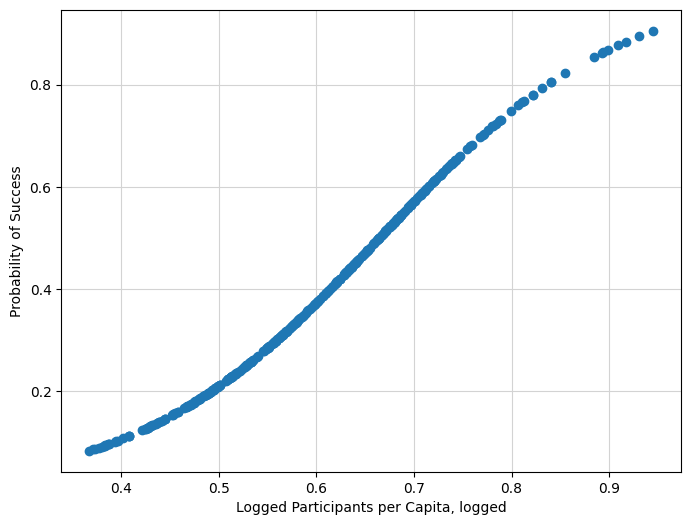

In [27]:
# Define the logistic regression model
X = copy_NAVCO3[['LOG_PARTICIPATION_PER_CAPITA']]
X = sm.add_constant(X)
y = copy_NAVCO3['SUCCESS']

# Fit the model
logit_model = sm.Logit(y, X).fit()

# Calculate the predicted probabilities
prediction = logit_model.predict(transform=True)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Add gridlines
ax.grid(color='lightgrey')

# Set gridlines to go behind other graph elements
ax.set_axisbelow(True)

# Create the scatter plot
ax.scatter(copy_NAVCO3['LOG_PARTICIPATION_PER_CAPITA'], prediction)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Logged Participants per Capita, logged')
ax.set_ylabel('Probability of Success')

plt.show()


### Explanation

The second logistic regression model was run with only the ‘LOG_PARTICIPATION_PER_CAPITA’ as the independent variable.

The model summary shows that ‘LOG_PARTICIPATION_PER_CAPITA’ is a statistically significant predictor of ‘SUCCESS’.

The coefficient for ‘LOG_PARTICIPATION_PER_CAPITA’ is positive, indicating that as the logged participants per capita increases, the log-odds of success also increase. The pseudo R-squared value of 0.1225 suggests that the model explains about 12.25% of the variance in ‘SUCCESS’.

==============================================================================================================

The scatterplot for the second model also shows the predicted probabilities of success (y-axis) against the logged participants per capita (x-axis).

The positive correlation observed in the plot aligns with the positive coefficient for ‘LOG_PARTICIPATION_PER_CAPITA’ in the model, reinforcing the finding that higher participation rates are associated with a higher probability of success.

==============================================================================================================

The difference between the two models lies in the independent variables included.

The first model includes ‘LOG_POPULATION’ as a control variable, while the second model does not.
This could lead to differences in the estimated coefficients and the explained variance (pseudo R-squared).

The scatterplots for both models show a similar trend, but the points may be distributed differently due to the different models used.

The second model might show a stronger positive correlation because it only considers ‘LOG_PARTICIPATION_PER_CAPITA’, whereas the first model also takes into account the effect of ‘LOG_POPULATION’.

## 4. The Level of Participation Tipping Point

As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.

Based on your data, create a table and explain how Chenoweth came up with the rule.

Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way.  From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

In [28]:
# Copy the data
copy_NAVCO4 = data_NAVCO.copy()

# Convert 'PERCENTAGEPOPULARPARTICIPATION' to percentage
copy_NAVCO4['PERCENTAGEPOPULARPARTICIPATION'] *= 100

# Create bins and labels for the new column
bins = [0.0001, 0.0035, 0.015, 0.06, 0.25, 1.0, 3.5, float('inf')]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

# Left-align the labels
labels = [label.ljust(len(max(labels, key=len))) for label in labels]

# Create a new column for "Peak Popular Participation (%)"
copy_NAVCO4['Peak Popular Participation (%)'] = pd.cut(copy_NAVCO4['PERCENTAGEPOPULARPARTICIPATION'], bins=bins, labels=labels, right=False)

# Calculate the success rate for each bin
table_data = copy_NAVCO4.groupby('Peak Popular Participation (%)', observed=False)['SUCCESS'].agg(['count', 'mean']).reset_index()
table_data.columns = ['Peak Popular Participation (%)', 'Observations', 'Success Rate']

# Convert success rate to percentage, round to 2 decimal places, and add '%' sign
table_data['Success Rate'] = (table_data['Success Rate'] * 100).round(2).astype(str) + '%' 

# Reverse the order of rows in the DataFrame
table_data = table_data.iloc[::-1].reset_index(drop=True)

# Print the table
print(table_data.to_string(index=False))

Peak Popular Participation (%)  Observations Success Rate
             greater than 3.5%            18       88.89%
             1.0% - 3.5%                  41       60.98%
             0.25% - 1.0%                 92       45.65%
             0.06% - 0.25%                95       45.26%
             0.015% - 0.06%               66       24.24%
             0.0035% - 0.015%             44        9.09%
             less than 0.0035%            24        4.17%


### Explanation

* For campaigns with greater than 3.5% popular participation, there were 18 observations and the success rate was 88.89%.

This means that nearly 89 out of 100 such campaigns were successful.

* For campaigns with 1.0% - 3.5% popular participation, there were 41 observations and the success rate was 60.98%.

* For campaigns with 0.25% - 1.0% popular participation, there were 92 observations and the success rate was 45.65%.

* For campaigns with 0.06% - 0.25% popular participation, there were 95 observations and the success rate was 45.26%.

* For campaigns with 0.015% - 0.06% popular participation, there were 66 observations and the success rate was 24.24%.

* For campaigns with 0.0035% - 0.015% popular participation, there were 44 observations and the success rate was 9.09%.

* For campaigns with less than 0.0035% popular participation, there were 24 observations and the success rate was 4.17%.

==============================================================================================================

From these results, we can see that the success rate of campaigns increases as the level of popular participation increases. 

This is consistent with Chenoweth’s 3.5% rule. 

The rule suggests that when at least 3.5% of the population participates in a campaign, the campaign is almost always successful. This rule is supported by the data, which shows a success rate of 88.89% for campaigns with more than 3.5% popular participation. 

This is significantly higher than the success rates for campaigns with lower levels of participation. 

Therefore, the 3.5% rule is a tipping point at which the probability of campaign success significantly increases.

Optimization terminated successfully.
         Current function value: 0.618980
         Iterations 5


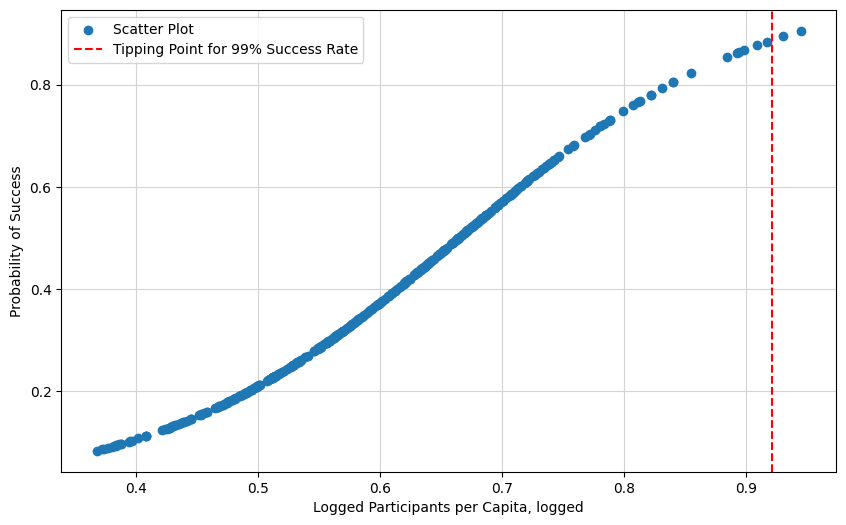

The tipping point for a 99% success rate is at logged population per capita: 9.21%


In [29]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add gridlines
ax.grid(color='lightgrey')

# Set gridlines to go behind other graph elements
ax.set_axisbelow(True)

# Create the scatter plot
ax.scatter(copy_NAVCO3['LOG_PARTICIPATION_PER_CAPITA'], prediction, label='Scatter Plot')

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Logged Participants per Capita, logged')
ax.set_ylabel('Probability of Success')

# Add a new column for logged population per capita
copy_NAVCO3['LOG_POPULATION_PER_CAPITA'] = np.log(copy_NAVCO3['PARTICIPATION'])/10

# Define the logistic regression model
X = copy_NAVCO3[['LOG_POPULATION_PER_CAPITA']]
X = sm.add_constant(X)
y = copy_NAVCO3['SUCCESS']

# Fit the model
logit_model = sm.Logit(y, X).fit()

# Calculate the predicted probabilities
predicted_probabilities = logit_model.predict(transform=True)

# Find the tipping point for a 99% success rate
tipping_point_index = np.argmax(predicted_probabilities >= 0.99)
tipping_point_population = X.iloc[tipping_point_index]['LOG_POPULATION_PER_CAPITA']

# Highlight the tipping point
ax.axvline(tipping_point_population, color='red', linestyle='--', label='Tipping Point for 99% Success Rate')
ax.legend()

plt.show()

print(f"The tipping point for a 99% success rate is at logged population per capita: {tipping_point_population*10:.2f}%")


## 5. Nonviolent Resistance and Target Regime Type

Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.


In [30]:
# Copy the data
copy_NAVCO5 = data_NAVCO.copy()
copy_polity5 = data_polity.copy()

# Add a column for the population
copy_NAVCO5['POPULATION'] = copy_NAVCO5['PARTICIPATION'] / copy_NAVCO5['PERCENTAGEPOPULARPARTICIPATION']

# Add a column for the logged population
copy_NAVCO5['LOG_POPULATION'] = np.log(copy_NAVCO5['POPULATION'])

# Add a column for the logged participants per capita
copy_NAVCO5['LOG_PARTICIPATION_PER_CAPITA'] = np.log(copy_NAVCO5['PARTICIPATION']) / copy_NAVCO5['LOG_POPULATION']

# Merging the datasets
merged_df = pd.merge(copy_NAVCO5, copy_polity5, left_on=['LOCATION', 'EYEAR'], right_on=['country', 'year'])

# Drop rows with missing values in relevant columns
merged_df = merged_df.dropna(subset=['SUCCESS', 'POPULATION'])

# Define the logistic regression model
logit_model = smf.logit("SUCCESS ~ NONVIOL + polity2 + LOG_PARTICIPATION_PER_CAPITA + LOG_POPULATION", data=merged_df)

# Fit the model
logit_model = logit_model.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.538560
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.2001
Time:                        20:42:20   Log-Likelihood:                -159.95
converged:                       True   LL-Null:                       -199.97
Covariance Type:            nonrobust   LLR p-value:                 1.720e-16
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.4287      1.846     -1.316      0.188